## Data Cleaning and Feature Analysis


In [136]:
import pymysql
from cryptography.fernet import Fernet
import json
from collections import namedtuple
import time
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine 

%matplotlib inline

<b> Increase the size of the screen to view more features </b>

In [137]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<b> Decrypt the credentials </b>

In [138]:
#Uncode the secret license file
def unencrypt():
    try:
        key = b'IXx5rHfP15FqP4ahx2pwcud-XmcBzU553Ri6p-nVhnc=' #Fernet.generate_key()
        cipher_suite = Fernet(key)
        with open('/usr/local/etc/musicmood_bytes.bin', 'rb') as file_object:
            for line in file_object:
                encryptedpwd = line
        uncipher_text = (cipher_suite.decrypt(encryptedpwd))
        plain_text_encryptedpassword = bytes(uncipher_text).decode("utf-8") #convert to string
        x = json.loads(plain_text_encryptedpassword, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
        return x
    except Exception as e:
        print(str(e))
        return "Error" 

<b> Connect to the Database </b>

In [139]:
#Setup the database connection
credentials = unencrypt()
user_id = credentials.user
user_password = credentials.password
dbname = credentials.dbname
server = credentials.server
conn = pymysql.connect(server,user_id,user_password,dbname)

<b> Obtain the data from the Database </b>

In [150]:
start_time = time.time()
df = pd.read_sql('SELECT * FROM songs_instance', con = conn)
print("--- %s seconds ---" % (time.time() - start_time))
df.head(15)

--- 1.8499791622161865 seconds ---


,trackid,bill_popularity,song,artist,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,first_appearance,year_first_appear,last_appearance,year_last_appear,decade,duration,end_of_fade_in,key_confidence,key_song,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,GrossDomesticProduct,PersonalIncome,Unemployment_Rate_Year_AVG,Adjusted_CPI_Year_AVG,Misery_Index_Year_AVG,genre,Blues,ChildrensMusic,Christian_Gospel,Christmas,Comedy,Country_,Folk,House_Electronic_Trance,Jazz,Last_Position,Latin,Metal,Pop_Standards,Pop,Punk,R_And_B,Rap_Hip_Hop,Rock_And_Roll,Rock,Ska_Reggae_Dancehall,Soul,Soundtrack,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,origin_source,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
0,TRTLZZL128EF342C64,1520,I Guess That's Why They Call It The Blues,Elton John,23,4,97,0,6,10,12,15,17,34,1983-10-29,1983,1984-03-31,1984,1980,286,0.624,0.788,0,-8.207,1,0.730,274.355,120.658,3,1.000,3638.1,2970.3,9.60,99.58,12.76,Rock,0,0,0,0,0,0,1,0,0,93,0,0,0,0,0,0,0,0,1,0,0,0,5,23,887,3,0.843041,0.568304,ORIGINAL,1983,100.0,290.0,0.34,80,229,0.35,1.5270
1,TRDFUQS12903CCEFD0,1611,Borderline,Madonna,30,10,98,0,1,8,12,15,17,46,1984-03-10,1984,1984-09-29,1984,1980,238,0.213,0.435,4,-5.906,0,0.399,222.586,119.888,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Pop,0,0,0,0,0,0,0,0,0,94,0,0,0,1,0,0,0,0,0,0,0,0,12,32,857,2,0.915823,0.665577,ORIGINAL,1984,92.0,339.0,0.27,86,285,0.30,1.6483
2,TRALSBI12903CCEEA0,1118,Holiday,Madonna,21,16,94,0,0,3,6,11,12,47,1983-10-29,1983,1984-03-17,1984,1980,368,0.398,0.427,9,-6.061,0,0.298,360.240,115.613,4,0.868,3638.1,2970.3,9.60,99.58,12.76,Pop,0,0,0,0,0,0,0,0,0,88,0,0,0,1,0,0,0,0,0,0,0,0,12,32,857,2,0.915823,0.665577,ORIGINAL,1983,70.0,220.0,0.32,86,285,0.30,1.6483
3,TRZTWSZ128E0792D57,1669,I Just Called To Say I Love You,Stevie Wonder,26,1,99,3,10,12,14,15,17,36,1984-08-18,1984,1985-02-09,1985,1980,279,0.000,0.930,1,-8.687,1,0.791,276.962,112.747,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Soul,0,0,0,0,0,0,0,0,0,93,0,0,0,0,0,0,0,0,0,0,1,0,7,11,657,2,0.757921,0.600265,ORIGINAL,1984,97.0,283.0,0.34,83,265,0.31,1.4474
4,TRPNZUI128F14964BD,1619,Master Blaster (Jammin'),Stevie Wonder,23,5,97,0,8,13,15,16,18,30,1980-09-20,1980,1981-02-21,1981,1980,388,0.311,0.364,10,-13.811,0,0.362,381.515,131.183,4,0.000,2862.5,2317.5,7.18,82.38,20.70,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,3,0.757921,0.600265,ORIGINAL,1980,132.0,524.0,0.25,83,265,0.31,1.4474
5,TRMDYGQ128F14963D6,1472,Part-Time Lover,Stevie Wonder,21,1,93,1,8,10,12,14,16,30,1985-09-07,1985,1986-01-25,1986,1980,253,0.305,0.631,3,-12.894,0,0.629,247.130,87.268,4,0.709,4346.7,3516.3,7.19,107.60,10.72,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,2,0.823576,0.590181,ORIGINAL,1985,97.0,243.0,0.40,83,265,0.31,1.4474
6,TRABKEC128F424DF63,1379,You Haven't Done Nothin,Stevie Wonder,19,1,93,1,7,11,13,14,15,27,1974-08-03,1974,1974-12-07,1974,1970,203,0.194,0.409,10,-11.170,0,0.326,194.258,102.516,4,0.554,1548.8,1249.3,5.64,49.32,16.63,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,2,0.757921,0.600265,ORIGINAL,1974,107.0,279.0,0.38,83,265,0.31,1.4474
7,TRWJKVP128F92DCA7E,1850,Billie Jean,Michael Jackson,25,1,98,7,11,13,17,18,20,26,1983-01-22,1983,2014-06-07,2014,1980,383,0.154,0.461,9,-5.038,0,0.487,367.926,117.032,4,0.533,3638.1,2970.3,9.60,99.58,12.76,Pop,0,0,0,0,0,0,0,0,0,73,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.866520,0.766545,ORIGINAL,1983,97.0,394.0,NaN,86,285,0.30,1.6483
8,TRBIGLJ12903CBAC47,1796,Rock With You,Michael Jackson,24,1,96,4,9,13,17,19,19,25,1979-11-03,1979,1980-04-12,1980,1970,204,0.108,0.269,11,-6.029,1,0.767,196.034,114.547,4,0.507,2632.1,2078.2,5.85,72.58,17.07,Pop,0,0,0,0,0,0,0,0,0,76,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.855245,0.899992,ORIGINAL,1979,97.0,394.0,NaN,86,285,0.30,1.6483
9,TRXHRYZ128F4264957,1302,Don't Stop 'til You Get Enough,Michael Jackson

<B> Describe the dataset </B>

In [151]:
df.describe()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,duration,end_of_fade_in,key_confidence,key_song,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,GrossDomesticProduct,PersonalIncome,Unemployment_Rate_Year_AVG,Adjusted_CPI_Year_AVG,Misery_Index_Year_AVG,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
count,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12251.000000,12251.000000,12251.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,10621.000000,10621.000000,7129.000000,12255.000000,12255.000000,12255.000000,12255.000000
mean,461.917585,8.590371,24.106161,57.427989,0.112444,1.080294,2.104774,3.076295,3.985149,4.848960,35.648552,1281.211261,1281.411832,237.804162,0.487354,0.312536,5.315300,-9.215717,0.709914,0.324624,143.095367,124.189140,3.626030,0.327048,3079.651620,2531.830355,3.816110,62.197439,6.488221,0.535537,1.478907,101.982864,2.495390,0.670480,0.479963,1986.581722,86.935599,259.026551,0.375365,87.425214,259.429376,0.341456,1.415320
std,646.707813,9.515133,29.813271,43.503135,1.002081,3.229548,4.882840,6.084759,7.014856,7.747965,32.429124,947.655524,947.804741,90.091553,1.200158,0.317765,3.588874,3.902081,0.453820,0.282247,122.733295,31.397375,1.114364,0.383979,4312.150791,3587.574412,3.086063,68.105618,5.557129,1.551580,5.153640,144.954553,0.561065,0.124608,0.116631,15.131608,36.722043,134.066366,0.127108,21.491572,73.601847,0.035276,0.375069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-37.695999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1956.000000,1.000000,1.000000,0.040000,67.000000,172.000000,0.260000,0.302600
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.000000,0.000000,0.000000,2.000000,-11.644000,0.000000,0.000000,0.000000,100.880500,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.589133,0.400982,1973.000000,66.000000,174.000000,0.290000,80.000000,229.000000,0.310000,1.398200
50%,167.000000,7.000000,9.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1968.000000,1968.000000,227.000000,0.000000,0.253000,5.000000,-8.686000,1.000000,0.373000,164.148000,121.603996,4.000000,0.069000,942.500000,730.700000,4.740000,34.790000,7.330000,0.000000,0.000000,38.000000,3.000000,0.671095,0.463155,1987.000000,82.000000,240.000000,0.360000,80.000000,229.000000,0.350000,1.527000
75%,799.000000,15.000000,44.000000,95.000000,0.000000,0.000000,1.000000,5.000000,7.000000,9.000000,63.000000,1986.000000,1986.000000,272.000000,0.339000,0.586000,9.000000,-6.260500,1.000000,0.562000,228.557000,141.956000,4.000000,0.680500,4590.200000,3725.700000,5.950000,109.690000,10.050000,0.000000,0.000000,153.000000,3.000000,0.761731,0.540461,2000.000000,100.000000,312.000000,0.440000,86.000000,265.000000,0.350000,1.527000
max,9009.000000,104.000000,100.000000,100.000000,84.000000,88.000000,95.000000,96.000000,104.000000,104.000000,100.000000,2017.000000,2018.000000,1241.000000,18.640000,1.000000,11.000000,-0.278000,1.000000,1.000000,1208.030000,249.559006,7.000000,1.000000,19390.600000,16427.300000,9.710000,235.5600

### Handling missing samples

In [152]:
mean_words_song_u = df['words_song_u'].mean()
print(mean_words_song_u)
mean_words_song = df['words_song'].mean()
print(mean_words_song)
print(df.shape)
values = {'Last_Position': 0, 'number_1s': 0, 'weeks_at_number_1': 0,'words_song_u':mean_words_song_u,\
          'words_song':mean_words_song}
df.fillna(value=values, inplace=True)
from numpy import nan
df.fillna(value=nan, inplace=True)
values2 = {'words_song_r': df['words_song_u']/df['words_song']}
df.fillna(value=values2, inplace=True)

df.head(15)

86.93559928443649
259.026551172206
(12255, 73)


,trackid,bill_popularity,song,artist,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,first_appearance,year_first_appear,last_appearance,year_last_appear,decade,duration,end_of_fade_in,key_confidence,key_song,loudness,mode,mode_confidence,start_of_fade_out,tempo,time_signature,time_signature_confidence,GrossDomesticProduct,PersonalIncome,Unemployment_Rate_Year_AVG,Adjusted_CPI_Year_AVG,Misery_Index_Year_AVG,genre,Blues,ChildrensMusic,Christian_Gospel,Christmas,Comedy,Country_,Folk,House_Electronic_Trance,Jazz,Last_Position,Latin,Metal,Pop_Standards,Pop,Punk,R_And_B,Rap_Hip_Hop,Rock_And_Roll,Rock,Ska_Reggae_Dancehall,Soul,Soundtrack,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,origin_source,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
0,TRTLZZL128EF342C64,1520,I Guess That's Why They Call It The Blues,Elton John,23,4,97,0,6,10,12,15,17,34,1983-10-29,1983,1984-03-31,1984,1980,286,0.624,0.788,0,-8.207,1,0.730,274.355,120.658,3,1.000,3638.1,2970.3,9.60,99.58,12.76,Rock,0,0,0,0,0,0,1,0,0,93,0,0,0,0,0,0,0,0,1,0,0,0,5,23,887,3,0.843041,0.568304,ORIGINAL,1983,100.0,290.0,0.340000,80,229,0.35,1.5270
1,TRDFUQS12903CCEFD0,1611,Borderline,Madonna,30,10,98,0,1,8,12,15,17,46,1984-03-10,1984,1984-09-29,1984,1980,238,0.213,0.435,4,-5.906,0,0.399,222.586,119.888,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Pop,0,0,0,0,0,0,0,0,0,94,0,0,0,1,0,0,0,0,0,0,0,0,12,32,857,2,0.915823,0.665577,ORIGINAL,1984,92.0,339.0,0.270000,86,285,0.30,1.6483
2,TRALSBI12903CCEEA0,1118,Holiday,Madonna,21,16,94,0,0,3,6,11,12,47,1983-10-29,1983,1984-03-17,1984,1980,368,0.398,0.427,9,-6.061,0,0.298,360.240,115.613,4,0.868,3638.1,2970.3,9.60,99.58,12.76,Pop,0,0,0,0,0,0,0,0,0,88,0,0,0,1,0,0,0,0,0,0,0,0,12,32,857,2,0.915823,0.665577,ORIGINAL,1983,70.0,220.0,0.320000,86,285,0.30,1.6483
3,TRZTWSZ128E0792D57,1669,I Just Called To Say I Love You,Stevie Wonder,26,1,99,3,10,12,14,15,17,36,1984-08-18,1984,1985-02-09,1985,1980,279,0.000,0.930,1,-8.687,1,0.791,276.962,112.747,4,1.000,4040.7,3281.8,7.51,103.93,11.88,Soul,0,0,0,0,0,0,0,0,0,93,0,0,0,0,0,0,0,0,0,0,1,0,7,11,657,2,0.757921,0.600265,ORIGINAL,1984,97.0,283.0,0.340000,83,265,0.31,1.4474
4,TRPNZUI128F14964BD,1619,Master Blaster (Jammin'),Stevie Wonder,23,5,97,0,8,13,15,16,18,30,1980-09-20,1980,1981-02-21,1981,1980,388,0.311,0.364,10,-13.811,0,0.362,381.515,131.183,4,0.000,2862.5,2317.5,7.18,82.38,20.70,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,3,0.757921,0.600265,ORIGINAL,1980,132.0,524.0,0.250000,83,265,0.31,1.4474
5,TRMDYGQ128F14963D6,1472,Part-Time Lover,Stevie Wonder,21,1,93,1,8,10,12,14,16,30,1985-09-07,1985,1986-01-25,1986,1980,253,0.305,0.631,3,-12.894,0,0.629,247.130,87.268,4,0.709,4346.7,3516.3,7.19,107.60,10.72,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,2,0.823576,0.590181,ORIGINAL,1985,97.0,243.0,0.400000,83,265,0.31,1.4474
6,TRABKEC128F424DF63,1379,You Haven't Done Nothin,Stevie Wonder,19,1,93,1,7,11,13,14,15,27,1974-08-03,1974,1974-12-07,1974,1970,203,0.194,0.409,10,-11.170,0,0.326,194.258,102.516,4,0.554,1548.8,1249.3,5.64,49.32,16.63,Soul,,,,,,,,,,,,,,,,,,,,,,,7,11,657,2,0.757921,0.600265,ORIGINAL,1974,107.0,279.0,0.380000,83,265,0.31,1.4474
7,TRWJKVP128F92DCA7E,1850,Billie Jean,Michael Jackson,25,1,98,7,11,13,17,18,20,26,1983-01-22,1983,2014-06-07,2014,1980,383,0.154,0.461,9,-5.038,0,0.487,367.926,117.032,4,0.533,3638.1,2970.3,9.60,99.58,12.76,Pop,0,0,0,0,0,0,0,0,0,73,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.866520,0.766545,ORIGINAL,1983,97.0,394.0,0.246193,86,285,0.30,1.6483
8,TRBIGLJ12903CBAC47,1796,Rock With You,Michael Jackson,24,1,96,4,9,13,17,19,19,25,1979-11-03,1979,1980-04-12,1980,1970,204,0.108,0.269,11,-6.029,1,0.767,196.034,114.547,4,0.507,2632.1,2078.2,5.85,72.58,17.07,Pop,0,0,0,0,0,0,0,0,0,76,0,0,0,1,0,0,0,0,0,0,0,0,11,30,607,2,0.855245,0.899992,ORIGINAL,1979,97.0,394.0,0.246193,86,285,0.30,1.6483
9,TRXHRYZ128F4264957,1302,Don't St

### Drop older loaded genre columns

In [153]:
df.drop(['end_of_fade_in','key_confidence','mode_confidence','start_of_fade_out','time_signature_confidence','GrossDomesticProduct',\
         'PersonalIncome','Unemployment_Rate_Year_AVG','Adjusted_CPI_Year_AVG','Misery_Index_Year_AVG','Blues',  'ChildrensMusic', \
         'Christian_Gospel', 'Christmas', 'Comedy', 'Country_', 'Folk', 'House_Electronic_Trance', 'Jazz', 'Latin', 'Metal', 'Pop_Standards', \
         'Pop', 'Punk', 'R_And_B', 'Rap_Hip_Hop', 'Rock_And_Roll', 'Rock', 'Ska_Reggae_Dancehall', 'Soul', 'Soundtrack'],axis=1, inplace=True)
df.head()

,trackid,bill_popularity,song,artist,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,first_appearance,year_first_appear,last_appearance,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,genre,Last_Position,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,origin_source,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second
0,TRTLZZL128EF342C64,1520,I Guess That's Why They Call It The Blues,Elton John,23,4,97,0,6,10,12,15,17,34,1983-10-29,1983,1984-03-31,1984,1980,286,0,-8.207,1,120.658,3,Rock,93,5,23,887,3,0.843041,0.568304,ORIGINAL,1983,100.0,290.0,0.34,80,229,0.35,1.5270
1,TRDFUQS12903CCEFD0,1611,Borderline,Madonna,30,10,98,0,1,8,12,15,17,46,1984-03-10,1984,1984-09-29,1984,1980,238,4,-5.906,0,119.888,4,Pop,94,12,32,857,2,0.915823,0.665577,ORIGINAL,1984,92.0,339.0,0.27,86,285,0.30,1.6483
2,TRALSBI12903CCEEA0,1118,Holiday,Madonna,21,16,94,0,0,3,6,11,12,47,1983-10-29,1983,1984-03-17,1984,1980,368,9,-6.061,0,115.613,4,Pop,88,12,32,857,2,0.915823,0.665577,ORIGINAL,1983,70.0,220.0,0.32,86,285,0.30,1.6483
3,TRZTWSZ128E0792D57,1669,I Just Called To Say I Love You,Stevie Wonder,26,1,99,3,10,12,14,15,17,36,1984-08-18,1984,1985-02-09,1985,1980,279,1,-8.687,1,112.747,4,Soul,93,7,11,657,2,0.757921,0.600265,ORIGINAL,1984,97.0,283.0,0.34,83,265,0.31,1.4474
4,TRPNZUI128F14964BD,1619,Master Blaster (Jammin'),Stevie Wonder,23,5,97,0,8,13,15,16,18,30,1980-09-20,1980,1981-02-21,1981,1980,388,10,-13.811,0,131.183,4,Soul,,7,11,657,3,0.757921,0.600265,ORIGINAL,1980,132.0,524.0,0.25,83,265,0.31,1.4474


### Categorical Genre and Decade to include in the analysis, we will be using One Hot Encoding

In [154]:
genres = pd.get_dummies(df['genre'],prefix='gnr',dummy_na=False)
genres.head()

keys = pd.get_dummies(df['key_song'],prefix='key',dummy_na=False)
keys.head()

,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0


### Drop the Last One to avoid self cancellation

In [155]:
genres.drop(['gnr_Soul'],axis =1,inplace=True)
genres.head()

keys.drop(['key_3'],axis =1,inplace=True)
keys.head()

,key_0,key_1,key_2,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0


### Concat Genre Columns

In [156]:
songs = pd.concat([df,genres],axis=1)
songs = pd.concat([songs,keys],axis=1)
songs.describe()

,bill_popularity,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,year_first_appear,year_last_appear,duration,key_song,loudness,mode,tempo,time_signature,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall,key_0,key_1,key_2,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.00000,12255.000000,12255.000000
mean,461.917585,8.590371,24.106161,57.427989,0.112444,1.080294,2.104774,3.076295,3.985149,4.848960,35.648552,1281.211261,1281.411832,237.804162,5.315300,-9.215717,0.709914,124.189140,3.626030,0.535537,1.478907,101.982864,2.495390,0.670480,0.479963,1986.581722,86.935599,259.026551,0.364790,87.425214,259.429376,0.341456,1.415320,0.006691,0.067646,0.026275,0.000326,0.029621,0.022358,0.006528,0.067156,0.137087,0.019502,0.002285,0.045777,0.049857,0.368666,0.031089,0.002856,0.121746,0.081110,0.110894,0.087475,0.077193,0.058099,0.116932,0.056140,0.10967,0.068788,0.081191
std,646.707813,9.515133,29.813271,43.503135,1.002081,3.229548,4.882840,6.084759,7.014856,7.747965,32.429124,947.655524,947.804741,90.091553,3.588874,3.902081,0.453820,31.397375,1.114364,1.551580,5.153640,144.954553,0.561065,0.124608,0.116631,15.131608,34.186147,124.808211,0.112119,21.491572,73.601847,0.035276,0.375069,0.081529,0.251147,0.159958,0.018064,0.169545,0.147852,0.080535,0.250303,0.343953,0.138288,0.047747,0.209010,0.217659,0.482463,0.173566,0.053367,0.327006,0.273015,0.314013,0.282541,0.266908,0.233940,0.321352,0.230202,0.31249,0.253104,0.273140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-37.695999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1956.000000,1.000000,1.000000,0.040000,67.000000,172.000000,0.260000,0.302600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,181.000000,2.000000,-11.644000,0.000000,100.880500,4.000000,0.000000,0.000000,0.000000,2.000000,0.589133,0.400982,1973.000000,69.000000,185.000000,0.300000,80.000000,229.000000,0.310000,1.398200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,167.000000,7.000000,9.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,1968.000000,1968.000000,227.000000,5.000000,-8.686000,1.000000,121.603996,4.000000,0.000000,0.000000,38.000000,3.000000,0.671095,0.463155,1987.

### Adding Target Feature


In [157]:
#df['is_top10'] = np.where(df['weeks_top_10']>0,1,0)
songs['is_top40'] = np.where(songs['weeks_top_40']>0,1,0)
songs.head()

,trackid,bill_popularity,song,artist,weeks_ranked,highest_rank,lowest_rank,weeks_top_spot,weeks_top_10,weeks_top_20,weeks_top_30,weeks_top_40,weeks_top_50,average_rank,first_appearance,year_first_appear,last_appearance,year_last_appear,decade,duration,key_song,loudness,mode,tempo,time_signature,genre,Last_Position,number_1s,weeks_at_number_1,chart_appearances,speed_general,artist_familiarity,artist_hotttnesss,origin_source,year_added,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall,key_0,key_1,key_2,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,is_top40
0,TRTLZZL128EF342C64,1520,I Guess That's Why They Call It The Blues,Elton John,23,4,97,0,6,10,12,15,17,34,1983-10-29,1983,1984-03-31,1984,1980,286,0,-8.207,1,120.658,3,Rock,93,5,23,887,3,0.843041,0.568304,ORIGINAL,1983,100.0,290.0,0.34,80,229,0.35,1.5270,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,TRDFUQS12903CCEFD0,1611,Borderline,Madonna,30,10,98,0,1,8,12,15,17,46,1984-03-10,1984,1984-09-29,1984,1980,238,4,-5.906,0,119.888,4,Pop,94,12,32,857,2,0.915823,0.665577,ORIGINAL,1984,92.0,339.0,0.27,86,285,0.30,1.6483,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,TRALSBI12903CCEEA0,1118,Holiday,Madonna,21,16,94,0,0,3,6,11,12,47,1983-10-29,1983,1984-03-17,1984,1980,368,9,-6.061,0,115.613,4,Pop,88,12,32,857,2,0.915823,0.665577,ORIGINAL,1983,70.0,220.0,0.32,86,285,0.30,1.6483,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,TRZTWSZ128E0792D57,1669,I Just Called To Say I Love You,Stevie Wonder,26,1,99,3,10,12,14,15,17,36,1984-08-18,1984,1985-02-09,1985,1980,279,1,-8.687,1,112.747,4,Soul,93,7,11,657,2,0.757921,0.600265,ORIGINAL,1984,97.0,283.0,0.34,83,265,0.31,1.4474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,TRPNZUI128F14964BD,1619,Master Blaster (Jammin'),Stevie Wonder,23,5,97,0,8,13,15,16,18,30,1980-09-20,1980,1981-02-21,1981,1980,388,10,-13.811,0,131.183,4,Soul,,7,11,657,3,0.757921,0.600265,ORIGINAL,1980,132.0,524.0,0.25,83,265,0.31,1.4474,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


### Drop billboard derived features

In [158]:
songs.drop(['bill_popularity', 'key_song','weeks_ranked', 'highest_rank', 'lowest_rank', 'weeks_top_spot', \
            'weeks_top_10', 'weeks_top_20', 'weeks_top_30', 'weeks_top_40', 'weeks_top_50', 'average_rank', \
            'year_first_appear', 'year_last_appear', 'number_1s', 'weeks_at_number_1', 'chart_appearances'\
            ,'year_added',],axis=1, inplace=True)
songs.describe()

,duration,loudness,mode,tempo,time_signature,speed_general,artist_familiarity,artist_hotttnesss,words_song_u,words_song,words_song_r,words_genre_u,words_genre,words_genre_r,words_second,gnr_Blues,gnr_Country,gnr_Folk,gnr_Funk,gnr_House Electronic Trance,gnr_Jazz,gnr_Latin,gnr_Metal,gnr_Pop,gnr_Pop Standards,gnr_Punk,gnr_Rap Hip Hop,gnr_Rhythm and Blues,gnr_Rock,gnr_Rock and Roll,gnr_Ska Reggae Dancehall,key_0,key_1,key_2,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,is_top40
count,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.000000,12255.00000,12255.000000,12255.000000,12255.000000
mean,237.804162,-9.215717,0.709914,124.189140,3.626030,2.495390,0.670480,0.479963,86.935599,259.026551,0.364790,87.425214,259.429376,0.341456,1.415320,0.006691,0.067646,0.026275,0.000326,0.029621,0.022358,0.006528,0.067156,0.137087,0.019502,0.002285,0.045777,0.049857,0.368666,0.031089,0.002856,0.121746,0.081110,0.110894,0.087475,0.077193,0.058099,0.116932,0.056140,0.10967,0.068788,0.081191,0.379111
std,90.091553,3.902081,0.453820,31.397375,1.114364,0.561065,0.124608,0.116631,34.186147,124.808211,0.112119,21.491572,73.601847,0.035276,0.375069,0.081529,0.251147,0.159958,0.018064,0.169545,0.147852,0.080535,0.250303,0.343953,0.138288,0.047747,0.209010,0.217659,0.482463,0.173566,0.053367,0.327006,0.273015,0.314013,0.282541,0.266908,0.233940,0.321352,0.230202,0.31249,0.253104,0.273140,0.485185
min,2.000000,-37.695999,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.040000,67.000000,172.000000,0.260000,0.302600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,181.000000,-11.644000,0.000000,100.880500,4.000000,2.000000,0.589133,0.400982,69.000000,185.000000,0.300000,80.000000,229.000000,0.310000,1.398200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,227.000000,-8.686000,1.000000,121.603996,4.000000,3.000000,0.671095,0.463155,86.935599,259.000000,0.335624,80.000000,229.000000,0.350000,1.527000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,272.000000,-6.260500,1.000000,141.956000,4.000000,3.000000,0.761731,0.540461,96.000000,296.000000,0.410000,86.000000,265.000000,0.350000,1.527000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
max,1241.000000,-0.278000,1.000000,249.559006,7.000000,3.000000,1.000000,1.082500,480.000000,2539.000000,1.000000,178.000000,530.000000,0.420000,2.115800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


### Feature seleccion through regularization

In [159]:
songs.dtypes
songs = songs.select_dtypes(include=['float64','int64','uint8']).copy()
print(songs.columns)

Index(['duration', 'loudness', 'mode', 'tempo', 'time_signature', 'speed_general', 'artist_familiarity', 'artist_hotttnesss', 'words_song_u', 'words_song', 'words_song_r', 'words_genre_u', 'words_genre', 'words_genre_r', 'words_second', 'gnr_Blues', 'gnr_Country', 'gnr_Folk', 'gnr_Funk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Latin', 'gnr_Metal', 'gnr_Pop', 'gnr_Pop Standards', 'gnr_Punk', 'gnr_Rap Hip Hop', 'gnr_Rhythm and Blues', 'gnr_Rock', 'gnr_Rock and Roll', 'gnr_Ska Reggae Dancehall', 'key_0', 'key_1', 'key_2', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'is_top40'], dtype='object')


In [160]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


In [162]:
features = songs[['duration', 'loudness', 'mode', 'tempo', 'time_signature', 'speed_general', \
                  'artist_familiarity', 'artist_hotttnesss', 'words_song_u', 'words_song', 'words_song_r', \
                  'words_genre_u', 'words_genre', 'words_genre_r', 'words_second', 'gnr_Blues', 'gnr_Country', \
                  'gnr_Folk', 'gnr_Funk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Latin', 'gnr_Metal', \
                  'gnr_Pop', 'gnr_Pop Standards', 'gnr_Punk', 'gnr_Rap Hip Hop', 'gnr_Rhythm and Blues', 'gnr_Rock', \
                  'gnr_Rock and Roll', 'gnr_Ska Reggae Dancehall','key_0', 'key_1', 'key_2', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', \
                  'key_9', 'key_10', 'key_11']]
labels = songs[['is_top40']]
print(len(features))
list(features)

12255


['duration',
 'loudness',
 'mode',
 'tempo',
 'time_signature',
 'speed_general',
 'artist_familiarity',
 'artist_hotttnesss',
 'words_song_u',
 'words_song',
 'words_song_r',
 'words_genre_u',
 'words_genre',
 'words_genre_r',
 'words_second',
 'gnr_Blues',
 'gnr_Country',
 'gnr_Folk',
 'gnr_Funk',
 'gnr_House Electronic Trance',
 'gnr_Jazz',
 'gnr_Latin',
 'gnr_Metal',
 'gnr_Pop',
 'gnr_Pop Standards',
 'gnr_Punk',
 'gnr_Rap Hip Hop',
 'gnr_Rhythm and Blues',
 'gnr_Rock',
 'gnr_Rock and Roll',
 'gnr_Ska Reggae Dancehall',
 'key_0',
 'key_1',
 'key_2',
 'key_4',
 'key_5',
 'key_6',
 'key_7',
 'key_8',
 'key_9',
 'key_10',
 'key_11']

In [123]:
features.shape

(12255, 48)

### Lasso (L1 Regularization)

In [163]:
model = Lasso(alpha = 0.001)
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('duration', -0.0001505557592655296), ('loudness', -0.004873128296080279), ('mode', 0.020542232641072928), ('tempo', -0.0009817435223880382), ('time_signature', 0.00420351706075493), ('speed_general', 0.022827475607409334), ('artist_familiarity', 0.0), ('artist_hotttnesss', 0.375330194787489), ('words_song_u', -0.00043436081727852844), ('words_song', 0.0005219185655469802), ('words_song_r', -0.25487138552158395), ('words_genre_u', -0.0065053299999210884), ('words_genre', 0.0006918442498836529), ('words_genre_r', -0.0), ('words_second', 0.1425521506062091), ('gnr_Blues', -0.0), ('gnr_Country', 0.0), ('gnr_Folk', 0.015937295612445713), ('gnr_Funk', -0.0), ('gnr_House Electronic Trance', -0.34803659340309984), ('gnr_Jazz', -0.2695523709021717), ('gnr_Latin', -0.0), ('gnr_Metal', -0.1889961327274137), ('gnr_Pop', -0.10341111287222868), ('gnr_Pop Standards', 0.0), ('gnr_Punk', -0.0), ('gnr_Rap Hip Hop', -0.0), ('gnr_Rhythm and Blues', 0.0), ('gnr_Rock', -0.18610403778936827), ('gnr_Rock an

### Ridge Regression (L2 Regularization)

In [164]:
model = Ridge(alpha=0.001)
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('duration', [-0.00011819276048467508, -0.004880238073286406, 0.019700596417755303, -0.0010521338633696859, 0.005128060933821469, 0.030539199385647534, -0.09006657708629726, 0.5347867057852073, 7.988396313874466e-05, 0.0003067116754066186, -0.4335824223005505, -0.005853229773047486, 0.00029919387639133565, -0.01698328798956074, 0.25022999681169583, 0.026085634461675316, -0.0026841728548869163, 0.012366711258674648, -0.2649308389968491, -0.3816953865137384, -0.299334571117198, -0.06921467318291553, -0.1208616404612545, -0.15268143380086857, -0.10640996591774904, -0.05415926120337166, -0.05264218539303198, 0.029927467710052478, -0.23287026910820743, 0.2035110018839942, -0.1251384908627384, -0.03154238277471535, -0.027021689104867196, -0.03644545728083384, -0.0475330940337243, -0.006767220839852975, -0.05681014626908886, -0.043311589347799294, -0.041946794540828086, -0.044702430931269355, -0.043068258518052245, -0.05651533370446956])]


### Elastic Net

In [165]:
model = ElasticNet(l1_ratio=0.001)
model.fit(features, labels)
print(list(zip(features, model.coef_.tolist())))

[('duration', -0.0004224247570699236), ('loudness', -0.006408182614124811), ('mode', 0.006926363024854779), ('tempo', -0.0008989656813318568), ('time_signature', 0.001955483780369953), ('speed_general', 0.0024297088610526095), ('artist_familiarity', 0.0017907974945708773), ('artist_hotttnesss', 0.004191646525970528), ('words_song_u', -0.0011649449608130177), ('words_song', 0.000920256937853908), ('words_song_r', -0.002179383435279164), ('words_genre_u', -0.008119512518920319), ('words_genre', 0.0019442308405827186), ('words_genre_r', -0.0), ('words_second', 0.01242467161876646), ('gnr_Blues', 0.0), ('gnr_Country', 0.005621764462826477), ('gnr_Folk', 0.0043048769528513196), ('gnr_Funk', -0.0), ('gnr_House Electronic Trance', -0.00710140822591064), ('gnr_Jazz', -0.004273181675696958), ('gnr_Latin', 0.0), ('gnr_Metal', -0.00968598156189902), ('gnr_Pop', -0.0), ('gnr_Pop Standards', 0.002945667589232455), ('gnr_Punk', 0.0), ('gnr_Rap Hip Hop', -2.7598378837643468e-05), ('gnr_Rhythm and Blu

## Transformer Methods ( SelectFromModel())

In [166]:
model = Lasso(alpha = 0.001)
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['duration', 'loudness', 'mode', 'tempo', 'time_signature', 'speed_general', 'artist_hotttnesss', 'words_song_u', 'words_song', 'words_song_r', 'words_genre_u', 'words_genre', 'words_second', 'gnr_Folk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Metal', 'gnr_Pop', 'gnr_Rock', 'gnr_Rock and Roll', 'key_5', 'key_6', 'key_11']


In [167]:
model = Ridge(alpha=0.001)
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['artist_hotttnesss', 'words_song_r', 'words_second', 'gnr_Funk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Metal', 'gnr_Pop', 'gnr_Pop Standards', 'gnr_Rock', 'gnr_Rock and Roll', 'gnr_Ska Reggae Dancehall']


In [168]:
model = ElasticNet(l1_ratio=0.001)
sfm = SelectFromModel(model)
sfm.fit(features, labels)
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['loudness', 'mode', 'artist_hotttnesss', 'words_genre_u', 'words_second', 'gnr_Country', 'gnr_Folk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Metal', 'gnr_Pop Standards', 'gnr_Rock', 'gnr_Rock and Roll', 'key_5']


In [169]:
from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=10)
model = RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'gini', max_features = 'auto',
                                             max_leaf_nodes =None,n_estimators = 120, warm_start = False, random_state = 7)
sfm = SelectFromModel(model)
sfm.fit(features, labels.values.ravel())
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['duration', 'loudness', 'tempo', 'artist_familiarity', 'artist_hotttnesss', 'words_song_u', 'words_song', 'words_song_r', 'words_second']


In [170]:
from sklearn.linear_model import LogisticRegression
#model = RandomForestClassifier(n_estimators=10)
model = LogisticRegression(C= 1.1, class_weight= 'balanced', dual= False, fit_intercept= True, max_iter= 90, multi_class= 'ovr', n_jobs= 1, penalty= 'l2', random_state= 2, solver= 'liblinear', tol= 0.0001, verbose= 0, warm_start= False)
sfm = SelectFromModel(model)
sfm.fit(features, labels.values.ravel())
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['artist_hotttnesss', 'words_song_r', 'words_second', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Metal', 'gnr_Pop', 'gnr_Rock', 'gnr_Rock and Roll', 'gnr_Ska Reggae Dancehall']


In [171]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
sfm = SelectFromModel(model)
sfm.fit(features, labels.values.ravel())
print(list(features.iloc[:, sfm.get_support(indices=True)]))

['duration', 'loudness', 'tempo', 'artist_familiarity', 'artist_hotttnesss', 'words_song_u', 'words_song', 'words_song_r', 'words_genre_u', 'words_second', 'gnr_House Electronic Trance']


### Visualizing Importances

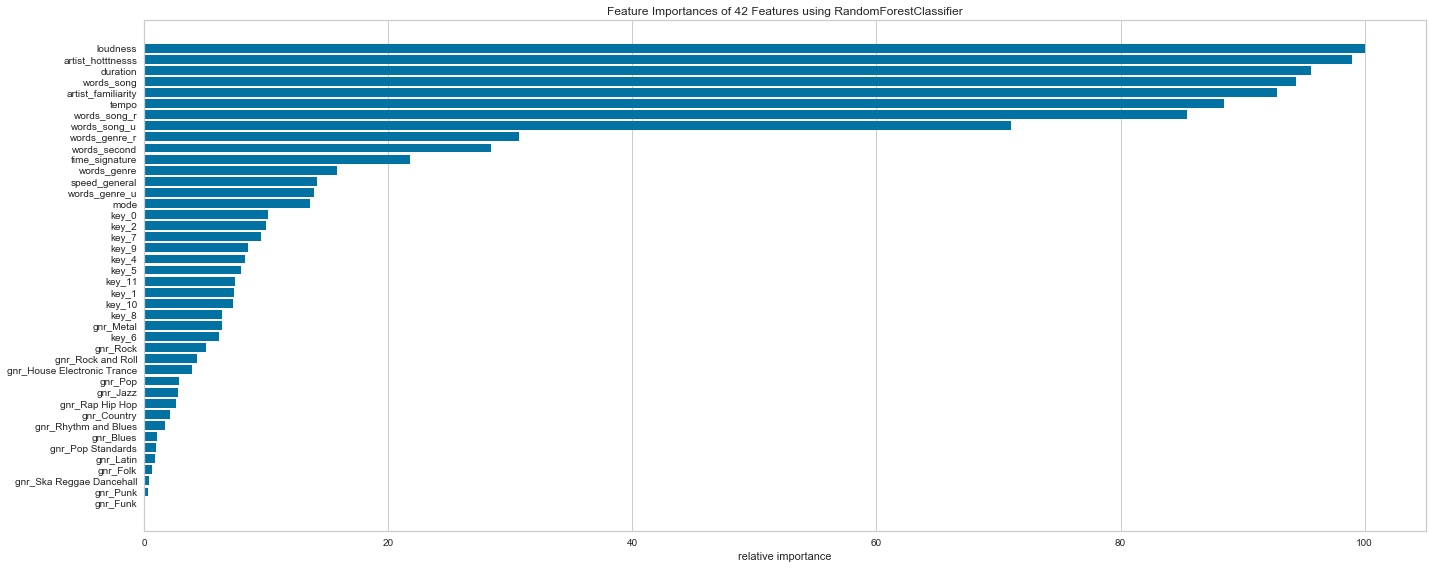

In [173]:
model = RandomForestClassifier(bootstrap = True, class_weight = None, criterion = 'gini', max_features = 'auto',
                                             max_leaf_nodes =None,n_estimators = 120, warm_start = False, random_state = 7)
model.fit(features, labels.values.ravel())
model.feature_importances_

_, ax = plt.subplots(figsize=(20,8))
oz = FeatureImportances(RandomForestClassifier())
oz.fit(features, labels.values.ravel())
oz.poof()

#### Its important to note that  actually the lyrics related features matter most than song musical features and all of the genres. 

### Saving Structure to Database

In [175]:
def sqlalchemy_engine():
    try:
        credentials = unencrypt()
        user_id = credentials.user
        user_password = credentials.password
        dbname = credentials.dbname
        server = credentials.server
        connstring = "mysql+mysqldb://{user}:{password}@{server}/{dbname}".format(server=server,user=user_id,password=user_password,dbname=dbname)
        engine = create_engine(connstring)
        return engine
    except Exception as e:
        print("Exception occurred \n" +str(e))
songs = songs[['duration', 'loudness', 'mode', 'tempo', 'time_signature', 'speed_general', \
                  'artist_familiarity', 'artist_hotttnesss', 'words_song_u', 'words_song', 'words_song_r', \
                  'words_genre_u', 'words_genre', 'words_genre_r', 'words_second', 'gnr_Blues', 'gnr_Country', \
                  'gnr_Folk', 'gnr_Funk', 'gnr_House Electronic Trance', 'gnr_Jazz', 'gnr_Latin', 'gnr_Metal', \
                  'gnr_Pop', 'gnr_Pop Standards', 'gnr_Punk', 'gnr_Rap Hip Hop', 'gnr_Rhythm and Blues', 'gnr_Rock', \
                  'gnr_Rock and Roll', 'gnr_Ska Reggae Dancehall','key_0', 'key_1', 'key_2', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', \
                  'key_9', 'key_10', 'key_11','is_top40']]
songs.to_sql(con = sqlalchemy_engine(), name='songs_instances_data', if_exists='append')